### **Visualizing Data from r/place**
Here, I will be using matplotlib to visualize common words to preview whether the sentiment to r/place 2023 was generally negative, neutral, or positive.

In [1]:
import csv
import matplotlib.pyplot as plt

c:\Users\lukel\OneDrive\Desktop\Github Projects\PlaceAnalysis\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lukel\OneDrive\Desktop\Github Projects\PlaceAnalysis\.venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\lukel\OneDrive\Desktop\Github Projects\PlaceAnalysis\.venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


First, we will find the most common comments on r/place 2023.

In [27]:
# store the sentence frequencies in a dict
# key=word, value=frequency
freqs = dict()

# open the file storing reddit comments
# specify utf-8 encoding to prevent unicode decode error
filepath = "place_comments.csv"
with open(filepath, "r", encoding="utf-8") as f:
    skip = next(f)
    csv_reader = csv.reader(f)
    for row in csv_reader:
        comment = row[0].lower()
        if comment not in freqs:
            freqs[comment] = 0
        freqs[comment] += 1

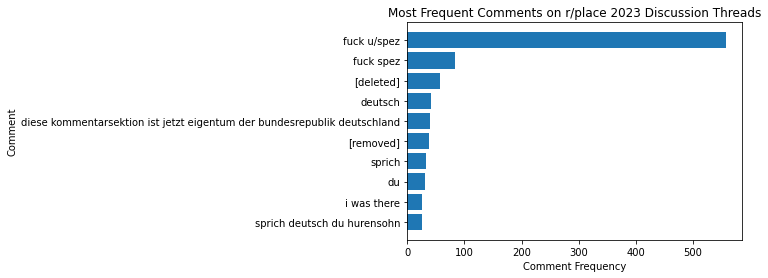

In [35]:
# sort the words in decreasing frequency
comments = [(comment, freqs[comment]) for comment in freqs]
comments.sort(key=lambda x: -x[1])

# store the top comments in two axes
# modify the LIMIT to find the top # of comments
LIMIT = 10
y, x = [], []
for i in range(LIMIT-1, -1, -1):
    y.append(comments[i][0])
    x.append(comments[i][1])

# plot the results
plt.barh(y, x)
plt.title("Most Frequent Comments on r/place 2023 Discussion Threads")
plt.xlabel("Comment Frequency")
plt.ylabel("Comment")
plt.show()

### **Data Preview Analysis**

**u/spez is unpopular.**<br>
From the visualization, we can see that "fuck u/spez" is the most popular comment, with over 500 instances being tracked in the comment sections. The variant "fuck spez" is the second most popular comment, indicating a massive distrust for u/spez, which represents Steve Huffman's account, who is the CEO of Reddit.

**There are numerous German users/comments on Reddit.**<br>
Surprisingly, five of the top ten frequent comments are in German. Therefore, when performing sentiment analysis on r/place data, the NLP model can be inaccurate if it is unable to understand German comments.

A workaround for this problem would be to identify if a comment is German or English. If a German NLP model and an English NLP model predict on comments of their respective to find the overall sentiment of the website.